## BoW

词袋模型是一种简单的文本表示方法，也是自然语言处理的一个经典模型。他将文本中的词看作一个个独立的个体，不考虑它们在句子中的顺序，只关心每个词出现的频次。

### 用词袋模型计算文本相似度

> 1.构建实验语料库

In [17]:
# 构建一个玩具数据集
corpus = ["我特别特别喜欢看电影",
        "这部电影真的是很好看的电影",
        "今天天气真好是难得的好天气",
        "我今天去看了一部电影",
        "电影院的电影都很好看"]

> 2.给句子分词

In [18]:
import jieba # 导入jiaba库
# 使用jieba.cut进行分词
corpus_tokenized = [list(jieba.cut(sentence)) for sentence in corpus]
print(corpus_tokenized)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/th/2pv5mrfd57x5852b1rgd_7y80000gn/T/jieba.cache
Loading model cost 0.515 seconds.
Prefix dict has been built successfully.


[['我', '特别', '特别', '喜欢', '看', '电影'], ['这部', '电影', '真的', '是', '很', '好看', '的', '电影'], ['今天天气', '真好', '是', '难得', '的', '好', '天气'], ['我', '今天', '去', '看', '了', '一部', '电影'], ['电影院', '的', '电影', '都', '很', '好看']]


> 3.创建词汇表

In [19]:
work_dict = {}

for sentence in corpus_tokenized:
    for word in sentence:
        if word not in work_dict:
            work_dict[word] = len(work_dict) # 分配word索引
print("词汇表:", work_dict)

词汇表: {'我': 0, '特别': 1, '喜欢': 2, '看': 3, '电影': 4, '这部': 5, '真的': 6, '是': 7, '很': 8, '好看': 9, '的': 10, '今天天气': 11, '真好': 12, '难得': 13, '好': 14, '天气': 15, '今天': 16, '去': 17, '了': 18, '一部': 19, '电影院': 20, '都': 21}


> 4.生成词袋表示

In [20]:
# 每个sentence的长度为词汇表的长度
bow_vectors = []
for sentence in corpus_tokenized:
    # 初始化向量
    sentence_voctor = [0] * len(work_dict)
    for word in sentence:
        # 在word的对应索引位置+1
        sentence_voctor[work_dict[word]] += 1
    bow_vectors.append(sentence_voctor)
# 向量中的数字，表示在sentence中对应索引位置的word出现的次数
print("词袋表示:", bow_vectors)

词袋表示: [[1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]


> 5.计算余弦相似度

关于余弦相似度的计算说明参考:https://zhuanlan.zhihu.com/p/646601306?utm_id=0    
余弦相似度常用于衡量文本、图像等高维数据等相似性，而向量距离更适用于聚类分析和推荐系统等

In [1]:
# 关于numpy中的linalg库
# np.linalg 是NumPy库中用于线性代数操作的模块。它提供了一系列用于矩阵操作、特征值计算、奇异值分解等线性代数运算的函数
import numpy as np
a = np.array([[4, 7],
              [2, 6]])

# 计算a的逆矩阵
inv_a = np.linalg.inv(a)
print(inv_a)

# 计算行列式
det_a = np.linalg.det(a)
print(det_a)

# 特征值和特征向量
eigvals, eigvecs = np.linalg.eig(a)
print("Eigenvalues:", eigvals)
print("Eigenvectors:", eigvecs)

# np.zeros
z1 = np.zeros(5)
print(z1)
print(np.zeros((2,2)))
# print(np.zeros(2,2)) 错误的格式
# 。。。

a = [1, 2, 3, 4]
print(a[:-1])
print(a[0:2])

[[ 0.6 -0.7]
 [-0.2  0.4]]
10.000000000000002
Eigenvalues: [1.12701665 8.87298335]
Eigenvectors: [[-0.92511345 -0.82071729]
 [ 0.37969079 -0.57133452]]
[0. 0. 0. 0. 0.]
[[0. 0.]
 [0. 0.]]
[1, 2, 3]
[1, 2]


In [22]:
# 使用numpy库来计算
import numpy as np
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2) # 计算两个向量的点积(内积)
    norm_a = np.linalg.norm(vec1) # 计算vec1的范数-长度
    norm_b = np.linalg.norm(vec2)
    return dot_product / (norm_a * norm_b)
# 初始化矩阵，用于存储任意两个句子的余弦相似度
similarity_matrix = np.zeros((len(corpus), len(corpus)))
for i in range(len(corpus)):
    for j in range(len(corpus)):
        similarity_matrix[i][j] = cosine_similarity(bow_vectors[i], bow_vectors[j])

# 打印下矩阵:
print("余弦相似度矩阵:\n", similarity_matrix)

余弦相似度矩阵:
 [[1.         0.2236068  0.         0.40089186 0.14433757]
 [0.2236068  1.         0.23904572 0.23904572 0.64549722]
 [0.         0.23904572 1.         0.         0.15430335]
 [0.40089186 0.23904572 0.         1.         0.15430335]
 [0.14433757 0.64549722 0.15430335 0.15430335 1.        ]]


> 6.可视化

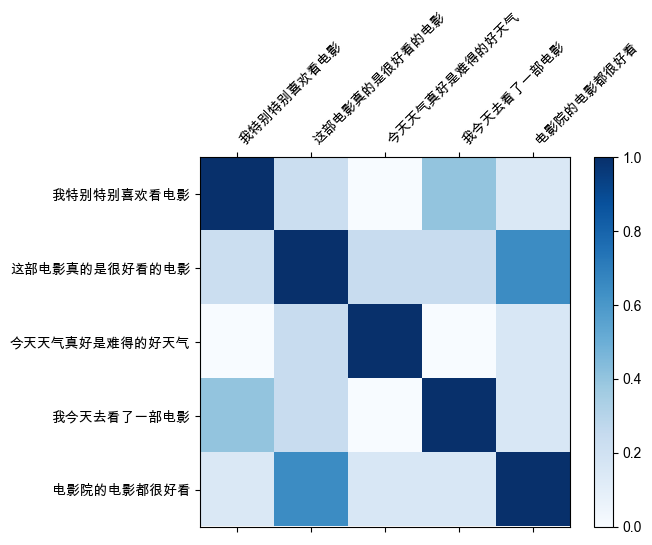

In [23]:
# 导入 matplotlib 库，用于可视化余弦相似度矩阵
import matplotlib.pyplot as plt

def show_matrix(similarity_matrix):
    plt.rcParams["font.family"]=['Arial Unicode MS'] # 用来设定字体样式
    plt.rcParams['font.sans-serif']=['Arial Unicode MS'] # 用来设定无衬线字体样式
    plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
    fig, ax = plt.subplots() # 创建一个绘图对象
    # 使用 matshow 函数绘制余弦相似度矩阵，颜色使用蓝色调
    cax = ax.matshow(similarity_matrix, cmap=plt.cm.Blues)
    fig.colorbar(cax) # 条形图颜色映射
    ax.set_xticks(range(len(corpus))) # x 轴刻度
    ax.set_yticks(range(len(corpus))) # y 轴刻度
    ax.set_xticklabels(corpus, rotation=45, ha='left') # 刻度标签 
    ax.set_yticklabels(corpus) # 刻度标签为原始句子
    plt.show() # 显示图形

show_matrix(similarity_matrix)

### 使用sklearn库计算余弦相似度

Feature names:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
Dense BOW Matrix:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
cosine_similarity matrix:
[[1.         0.79056942 0.54772256 1.        ]
 [0.79056942 1.         0.4330127  0.79056942]
 [0.54772256 0.4330127  1.         0.54772256]
 [1.         0.79056942 0.54772256 1.        ]]
['我 特别 特别 喜欢 看 电影', '这部 电影 真的 是 很 好看 的 电影', '今天天气 真好 是 难得 的 好 天气', '我 今天 去 看 了 一部 电影', '电影院 的 电影 都 很 好看']
Feature names:
['一部' '今天' '今天天气' '喜欢' '天气' '好看' '特别' '电影' '电影院' '真好' '真的' '这部' '难得']
Dense BOW Matrix:
[[0 0 0 1 0 0 2 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 2 0 0 1 1 0]
 [0 0 1 0 1 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0 0 0 0]]
cosine_similarity matrix:
[[1.         0.3086067  0.         0.23570226 0.23570226]
 [0.3086067  1.         0.         0.43643578 0.65465367]
 [0.         0.         1.         0.         0.        ]
 [0.23570226 0.43643578 0.         1.       

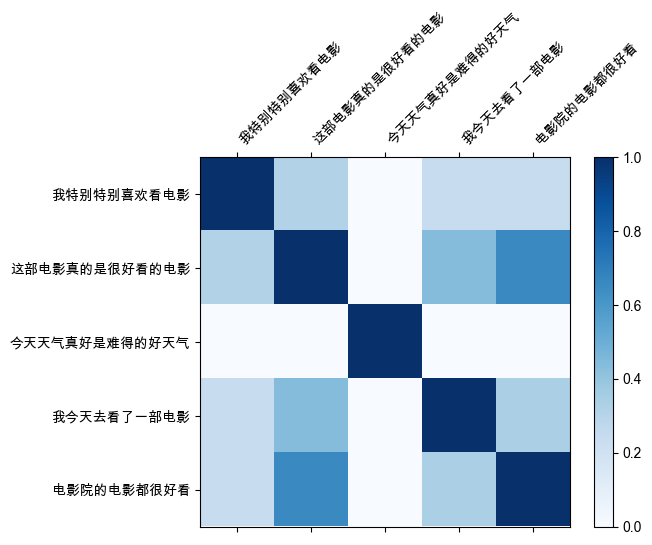

In [37]:
# 导包
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


def calcu_cos_sim(corpus):
    # 创建Bow表示
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(corpus)
    # 使用的是稀疏表示方式
    # print(bow_matrix)
    # print(type(bow_matrix))

    # 打印词汇表
    features_name = vectorizer.get_feature_names_out()
    print("Feature names:")
    print(features_name)

    dense_bow_matrix = bow_matrix.toarray()
    print("Dense BOW Matrix:")
    print(dense_bow_matrix)

    # 计算余弦相似度矩阵
    sim_matrix = cosine_similarity(bow_matrix, bow_matrix)
    print("cosine_similarity matrix:")
    print(sim_matrix)

    return sim_matrix

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

calcu_cos_sim(corpus)

print("======================================================================")

corpus = ["我特别特别喜欢看电影",
        "这部电影真的是很好看的电影",
        "今天天气真好是难得的好天气",
        "我今天去看了一部电影",
        "电影院的电影都很好看"]

# 中文词汇需要先分词
corpus_jieba = [" ".join(jieba.cut(sentence)) for sentence in corpus]
print(corpus_jieba)

sim_matrix = calcu_cos_sim(corpus_jieba)
show_matrix(sim_matrix)

### Thinking
在词袋模型中所有词的重要性都是相同的，在实际文本中，一些词(如停用词,中文的"的" "了"等)出现频率高，但是不重要；  
而一些词出现频率高，但可能非常重要，所以可以通过TF-IDF(词频-逆文档频率)表示。   
说明：https://blog.csdn.net/qq_28790663/article/details/115521076

In [40]:
# 使用sklearn来计算
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

tf_tokenizer = TfidfVectorizer()
tf_idf_matrix = tf_tokenizer.fit_transform(corpus)

# 相比较于bow没有考虑重要性，tf-idf输出的bow矩阵更合理
print(tf_tokenizer.get_feature_names_out())
print(tf_idf_matrix.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


In [45]:
# 手动写一个TF-IDF计算公式
from collections import Counter

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# 需要处理语料，即去除结尾标点符号以及不区分大小写
# 可以使用nltk库，也可以手动处理
def pre_process_sentence(sentence):
    from string import punctuation
    lower_sentence = sentence.lower()
    words = [word.strip(punctuation) for word in lower_sentence.split()]
    return words

counter_list = []
for sentence in corpus:
    counter_list.append(Counter(pre_process_sentence(sentence)))
print(counter_list)

# 定义计算TF-IDF的函数
def tf_idf(word,counter,counter_list):
    # 分别计算tf和idf
    def tf(word,counter):
        return counter[word] / sum(counter.values())
    
    def idf(word,counter_list):
        docs_num = len(counter_list)
        word_num = sum([1 for counter in counter_list if word in counter])
        return np.log(docs_num / (word_num + 1))
    return tf(word,counter) * idf(word,counter_list)

# 遍历每个sencente输出tf-idf值:
for i,counter in enumerate(counter_list):
    print(f"第{i}个sentence的tf-idf值为:")
    counter_value = {word : tf_idf(word,counter,counter_list) for word in counter}
    print(counter_value)


[Counter({'this': 1, 'is': 1, 'the': 1, 'first': 1, 'document': 1}), Counter({'document': 2, 'this': 1, 'is': 1, 'the': 1, 'second': 1}), Counter({'and': 1, 'this': 1, 'is': 1, 'the': 1, 'third': 1, 'one': 1}), Counter({'is': 1, 'this': 1, 'the': 1, 'first': 1, 'document': 1})]
第0个sentence的tf-idf值为:
{'this': -0.044628710262841945, 'is': -0.044628710262841945, 'the': -0.044628710262841945, 'first': 0.05753641449035617, 'document': 0.0}
第1个sentence的tf-idf值为:
{'this': -0.03719059188570162, 'document': 0.0, 'is': -0.03719059188570162, 'the': -0.03719059188570162, 'second': 0.11552453009332421}
第2个sentence的tf-idf值为:
{'and': 0.11552453009332421, 'this': -0.03719059188570162, 'is': -0.03719059188570162, 'the': -0.03719059188570162, 'third': 0.11552453009332421, 'one': 0.11552453009332421}
第3个sentence的tf-idf值为:
{'is': -0.044628710262841945, 'this': -0.044628710262841945, 'the': -0.044628710262841945, 'first': 0.05753641449035617, 'document': 0.0}
